In [0]:
#For reproducable results on CPU:
#from numpy.random import seed
#seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)
#!pip uninstall tensorflow
#!pip3 install --upgrade tensorflow-gpu==1.4


In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
!curl https://raw.githubusercontent.com/muke888/UdemyDeepLearning/master/3.%20Recurrent%20Neural%20Networks/Google_Stock_Price_Train.csv -o Google_Stock_Price_Train.csv
!curl https://raw.githubusercontent.com/muke888/UdemyDeepLearning/master/3.%20Recurrent%20Neural%20Networks/Google_Stock_Price_Test.csv -o Google_Stock_Price_Test.csv
  
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63488  100 63488    0     0   433k      0 --:--:-- --:--:-- --:--:--  433k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1029  100  1029    0     0  10831      0 --:--:-- --:--:-- --:--:-- 10831


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [2]:
training_set = dataset_train.iloc[:, 1:2].values
print(training_set[:5])
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]
(1258, 1)


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
print(X_train[0])
print(X_train.shape)
print(y_train[0])
print(y_train.shape)

[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]
(1198, 60)
0.08627874097775134
(1198,)


In [6]:
# Reshaping
#X_train = np.reshape(X_train, (1198, 60, 1))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train[0])
print(X_train.shape)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]]
(1198, 60, 1)


In [7]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(dataset_test.shape)
real_stock_price[:3]

(20, 6)


array([[778.81],
       [788.36],
       [786.08]])

In [8]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
#inputs = dataset_total[1278-20-60:]
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [9]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs[0]
inputs.shape

(80, 1)

In [0]:
X_test = []
y_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LSTM
from keras.layers import CuDNNLSTM # For GPU only
from keras.layers import Dropout


# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(CuDNNLSTM(units = 50, return_sequences = True, input_shape = (60, 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(CuDNNLSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(CuDNNLSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(CuDNNLSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32, verbose=1,
          validation_data=(X_test, y_test))

1198/1198 [==============================] - 3s 2ms/step - loss: 8.9025e-04 - val_loss: 0.0026
Epoch 292/300
1198/1198 [==============================] - 3s 2ms/step - loss: 8.5828e-04 - val_loss: 0.0020
Epoch 293/300
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0010 - val_loss: 2.1136e-04
Epoch 294/300
1198/1198 [==============================] - 3s 2ms/step - loss: 9.9828e-04 - val_loss: 0.0018
Epoch 295/300
1198/1198 [==============================] - 3s 2ms/step - loss: 9.4803e-04 - val_loss: 0.0013
Epoch 296/300
1198/1198 [==============================] - 3s 2ms/step - loss: 8.9774e-04 - val_loss: 5.6739e-04
Epoch 297/300
1198/1198 [==============================] - 3s 2ms/step - loss: 8.8479e-04 - val_loss: 0.0016
Epoch 298/300
1198/1198 [==============================] - 3s 2ms/step - loss: 8.6962e-04 - val_loss: 0.0015
Epoch 299/300
1198/1198 [==============================] - 3s 2ms/step - loss: 8.8322e-04 - val_loss: 8.7850e-04
Epoch 300/300
1198/1198 [

In [12]:
# Getting the predicted stock price of 2017
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[793.8374 ]
 [791.9788 ]
 [797.71576]
 [796.91425]
 [801.6262 ]
 [808.84595]
 [809.8688 ]
 [807.6611 ]
 [809.01404]
 [810.04865]
 [810.0367 ]
 [809.3716 ]
 [809.15735]
 [810.53186]
 [811.0833 ]
 [819.8094 ]
 [824.575  ]
 [828.714  ]
 [827.11884]
 [815.7456 ]]


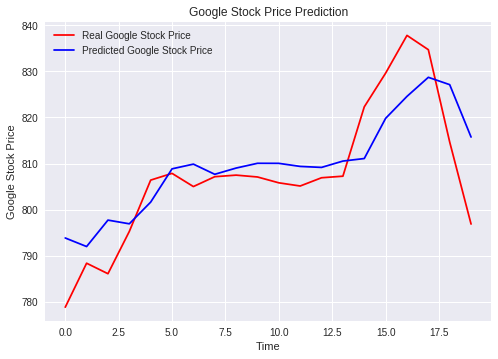

In [13]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()